In [31]:
import matplotlib.pyplot as plt
import random
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,Flatten,Dense
import seaborn as sns
from tensorflow.keras.models import save_model
from tensorflow.math import confusion_matrix

In [32]:
directory = '/content/drive/MyDrive/Train'
categories = ['with_mask','without_mask']

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# Load data and resize it with size 100 by 100
Image_size = 100
data = []
for category in categories:
    label = categories.index(category)
    folder = os.path.join(directory,category)
    for img_name in os.listdir(folder):
        image_path = os.path.join(folder,img_name)
        image = cv2.imread(image_path)
        if image is not None:
            resized_image = cv2.resize(image,(Image_size,Image_size))
            data.append([resized_image,label])

In [35]:
# Find two indices, one for masked image and one for not
twoindices = []
has = False
nothave = False
index = 0
for feature, label in data:
    if has == False and label == 0:
        twoindices.append(index)
        has = True
    elif nothave == False and label == 1:
        twoindices.append(index)
        nothave = True
    if has == True and nothave == True:
        break
    index += 1

masked


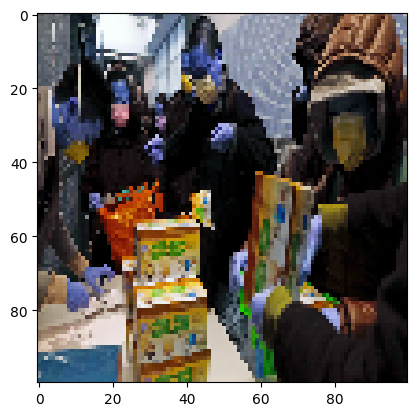

not masked


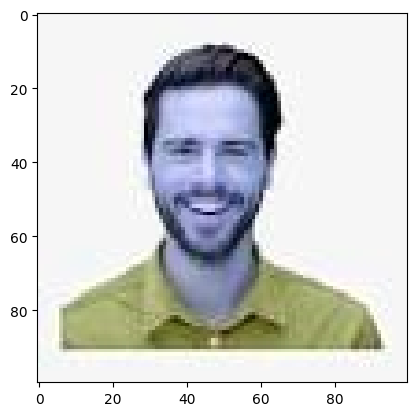

In [36]:
# Show tow images, one with mask and another without
for index in twoindices:
    print('not masked' if data[index][1] == 1 else 'masked')
    plt.imshow(data[index][0])
    plt.show()

In [37]:
# Shuffle data
random.shuffle(data)

In [38]:
# Split data into input and label data
X = []
Y = []
for feature, label in data:
    X.append(feature)
    Y.append(label)

In [39]:
print(f'X:{len(X)}, Y:{len(Y)}')

X:7542, Y:7542


In [40]:
# Convert data into numpy array
Y = np.array(Y)
X = np.array(X)
# Show the input and label data size
print(X.shape)
print(Y.shape)

(7542, 100, 100, 3)
(7542,)


In [41]:
# Scaling images values
X = X/255

not masked


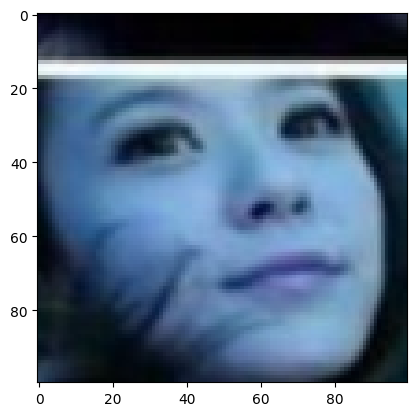

not masked


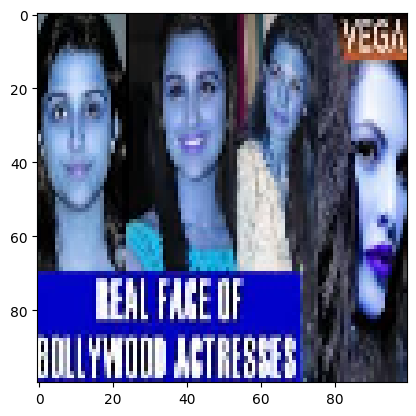

not masked


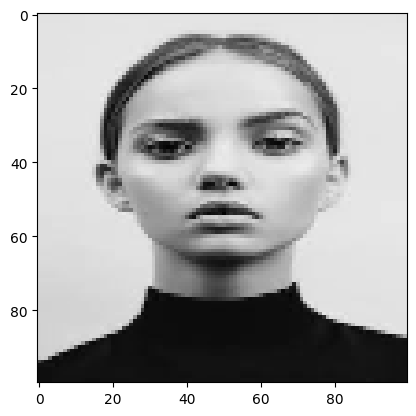

masked


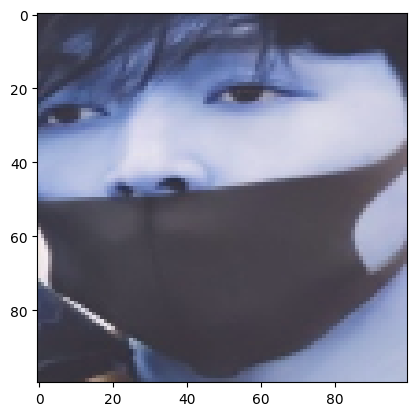

not masked


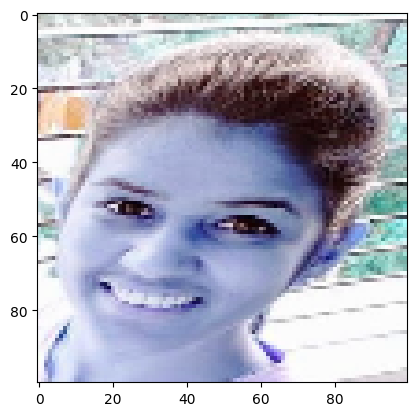

In [42]:
# Show the first five images and its labels
for i in range(5):
    print('masked' if Y[i] == 0 else 'not masked')
    plt.imshow(X[i])
    plt.show()

In [43]:
# Split data into train and test data
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.95,random_state=2)
print(X.shape,x_train.shape,x_test.shape)
print(Y.shape,y_train.shape,y_test.shape)

(7542, 100, 100, 3) (7164, 100, 100, 3) (378, 100, 100, 3)
(7542,) (7164,) (378,)


In [44]:
# Create the model

# Determine the input size
Input_size = (Image_size,Image_size,3)
# Determine the number of classes
Num_classes = 2

Model = Sequential([
    Input(shape=Input_size),
    Conv2D(32,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),

    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(Num_classes,activation='softmax')
])

In [45]:
# Compile the model
Model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [46]:
# train the model
result = Model.fit(x_train,y_train,validation_split=0.2,epochs=17)

Epoch 1/17
180/180 [==============================] - 11s 59ms/step - loss: 0.3413 - accuracy: 0.8491 - val_loss: 0.2730 - val_accuracy: 0.8967
Epoch 2/17
180/180 [==============================] - 10s 55ms/step - loss: 0.2073 - accuracy: 0.9152 - val_loss: 0.1879 - val_accuracy: 0.9316
Epoch 3/17
180/180 [==============================] - 10s 55ms/step - loss: 0.1446 - accuracy: 0.9408 - val_loss: 0.1578 - val_accuracy: 0.9477
Epoch 4/17
180/180 [==============================] - 10s 56ms/step - loss: 0.0956 - accuracy: 0.9661 - val_loss: 0.2565 - val_accuracy: 0.9267
Epoch 5/17
180/180 [==============================] - 10s 56ms/step - loss: 0.0692 - accuracy: 0.9777 - val_loss: 0.2007 - val_accuracy: 0.9428
Epoch 6/17
180/180 [==============================] - 10s 56ms/step - loss: 0.0350 - accuracy: 0.9881 - val_loss: 0.2253 - val_accuracy: 0.9505
Epoch 7/17
180/180 [==============================] - 10s 55ms/step - loss: 0.0410 - accuracy: 0.9874 - val_loss: 0.2369 - val_accuracy:

In [47]:
# evaluate the model
evaluation = Model.evaluate(x_test,y_test)
print("the loss value is: ",evaluation[0])
print("the accuracy value is: ",evaluation[1])

12/12 [==============================] - 0s 16ms/step - loss: 0.2325 - accuracy: 0.9524
the loss value is:  0.2324979454278946
the accuracy value is:  0.9523809552192688


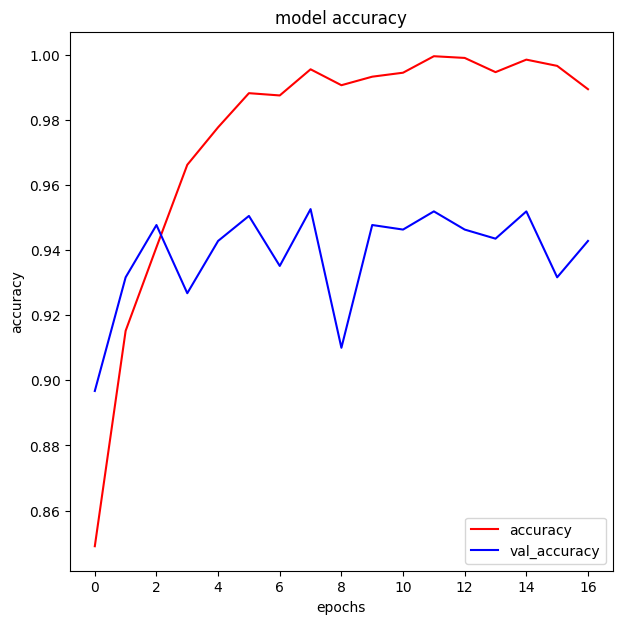

In [48]:
# Visualize the accuracy with the validation accuracy
plt.figure(figsize=(7,7))
plt.plot(result.history['accuracy'],color='red')
plt.plot(result.history['val_accuracy'],color='blue')
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy','val_accuracy'],loc='lower right')

In [49]:
# Make the model predict on test input data
predicted_y = Model.predict(x_test)

12/12 [==============================] - 0s 16ms/step


In [50]:
y_predicted_values = []
for value in predicted_y:
    y_predicted_values.append(np.argmax(value))
comparison = []
for predicted_value,true_value in zip(y_predicted_values,y_test):
    comparison.append([predicted_value,true_value])
print(comparison)

[[1, 1], [0, 0], [1, 1], [1, 1], [1, 1], [0, 0], [1, 1], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [1, 0], [0, 0], [1, 1], [1, 1], [0, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [0, 1], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [1, 1], [1, 1], [0, 0], [1, 1], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [1, 1], [0, 1], [0, 0], [1, 1], [0, 0], [1, 1], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [1, 1], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [0, 0], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0], [1, 0], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [1, 1], [0, 0], [1, 1], [0, 0], [1, 1], [1, 1], [0, 0], [1, 1], [0, 0], [1, 1], [1, 1], [0, 0], [1, 1], [1, 1], [0, 0], [0, 0], [1, 1], [0, 0], [0, 0], [0, 0], [1, 1], [1, 1], [1, 1], [0, 0], [0, 0], [0, 0], [0, 0], [0, 0], [1, 1],

<Axes: >

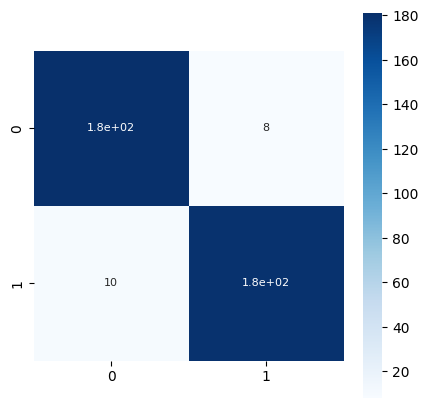

In [51]:
plt.figure(figsize=(5,5))
conf_matrix = confusion_matrix(y_test,y_predicted_values)
sns.heatmap(conf_matrix,square=True,cbar=True,annot=True,annot_kws={'size':8},cmap='Blues')

In [52]:
Model.save('/content/drive/MyDrive/saved_model')

In [53]:
# Load the pre-trained model
model = load_model('/content/drive/MyDrive/saved_model/my_model.h5')

NameError: name 'load_model' is not defined

In [ ]:
# Make a predictive system
def detect_mask(image_path):
    image = cv2.imread(image_path)
    # Ensure the image has 3 color channels (e.g., convert from grayscale to RGB)
    if image.shape[-1] == 1:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    # Resize the image
    resized_image = cv2.resize(image,(Image_size,Image_size))
    # Normalize the image by scaling it
    resized_image = resized_image / 255

    # Make the model predict what is in the image if it's dog will print 1 otherwise will print 0
    prediction = Model.predict(np.expand_dims(resized_image, axis=0))
    print(prediction)
    predicted_class = ['Masked','Not Masked'][np.argmax(prediction)]
    print(predicted_class)

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
folder_path = '/content/drive/MyDrive/Test'
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]
for image_file in image_files:
    image_path = os.path.join(folder_path, image_file)
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
    detect_mask(image_path)

In [ ]:
image_path = '/content/drive/MyDrive/Train/with_mask/with_mask_1016.jpg'
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()
detect_mask(image_path)